# Get 100 tweets from Twitter

In [ ]:
#from https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/
#tweepy can be installed with 'pip install tweepy'
import tweepy
from tweepy import OAuthHandler

# THESE KEYS AND SECRETS ARE FAKE THEY WILL NOT WORK
# USE YOUR OWN
consumer_key = 'RERV9rOUYzfbGgIf9x7RLixcb'
consumer_secret = '9XAjVKtGSkjlumI9cxrr7qoKkjCtTcZjGM7Ca7XmyKalXQh0Lk'
access_token = '557113581-pUWMOOsRuwXZs5Zcvm5OabJhZUXVyukRWg9x2Hyy'
access_secret = 'dvuVeXPbCneU95bIfNu3QI2mcwYxT8lsXrMCx7RfRizdp'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

results = api.search("#trump", count=100) #100 is the max that the api search will return
print(len(results))
for item in results:
    print(item.text)
    print(type(item))
    break

# Write contents to a file

In [ ]:
import json
with open("hundredTweets.json", "w") as f:
    # print(len(results))
    for tweet in results:
        f.write(json.dumps(tweet._json) + "\n")

# Open a 100 tweet file

In [3]:
import json
tweets = []
with open("hundredTweets.json", "r") as inputFile:
    for line in inputFile:
        print(line)
        tweets.append(json.loads(line))

{"created_at": "Wed Jun 07 21:18:37 +0000 2017", "id": 872563472306851840, "id_str": "872563472306851840", "text": "RT @LVNancy: No matter how Liberals spin the #Ruassia theory, #Comey REPEATEDLY told @realDonaldTrump he was NOT under investigation\n#Trump\u2026", "truncated": false, "entities": {"hashtags": [{"text": "Ruassia", "indices": [45, 53]}, {"text": "Comey", "indices": [62, 68]}, {"text": "Trump", "indices": [133, 139]}], "symbols": [], "user_mentions": [{"screen_name": "LVNancy", "name": "\u0273\u03b1\u0273\u0aee\u10e7 \u0646", "id": 69190453, "id_str": "69190453", "indices": [3, 11]}, {"screen_name": "realDonaldTrump", "name": "Donald J. Trump", "id": 25073877, "id_str": "25073877", "indices": [85, 101]}], "urls": []}, "metadata": {"iso_language_code": "en", "result_type": "recent"}, "source": "<a href=\"http://twitter.com/#!/download/ipad\" rel=\"nofollow\">Twitter for iPad</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null,

# Tokenize

In [5]:
import json
from nltk.tokenize import TweetTokenizer
from collections import Counter
from nltk.corpus import stopwords
import string

print(len(tweets))
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

count_all = Counter()
for tweet in tweets:
    text=tweet.text
    #print(text)
    terms = [term.lower() for term in TweetTokenizer().tokenize(text) if term not in stop]
    count_all.update(terms)
# Print the first 5 most frequent words
print(count_all.most_common(10))

100


AttributeError: 'dict' object has no attribute 'text'

# Plotting Sample

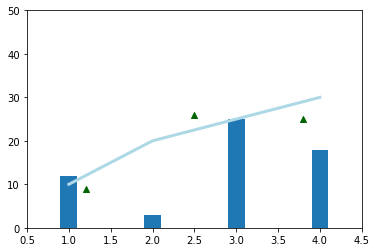

In [6]:
import matplotlib.pyplot as plt

#special ipython/jupyter command that keeps the output in this window rather than opening another one.
%matplotlib inline 

plt.figure()
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.bar([1,2,3,4],[12,3,25,18], width=0.2, align='center')
plt.xlim(0.5, 4.5)
plt.ylim(0,50)
plt.show()

# Plot the chart

In [ ]:
%matplotlib inline
count_all_dict = dict(count_all.most_common(10))
import matplotlib.pyplot as plt
#plt.figure(figsize=(100, 40))
plt.bar(range(len(count_all_dict)), count_all_dict.values(), align='center')
plt.xticks(range(len(count_all_dict)), list(count_all_dict.keys()),rotation='vertical')

plt.show()